#**Text Classification with an RNN (LSTM)**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
model = models.Sequential([
    layers.Embedding(vocab_size, 128, input_length=maxlen),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6854 - loss: 0.5712 - val_accuracy: 0.8236 - val_loss: 0.3866
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8999 - loss: 0.2541 - val_accuracy: 0.8572 - val_loss: 0.3247
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9398 - loss: 0.1672 - val_accuracy: 0.8724 - val_loss: 0.3301


In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {acc:.4f}")

782/782 - 4s - 5ms/step - accuracy: 0.8630 - loss: 0.3471

Test Accuracy: 0.8630


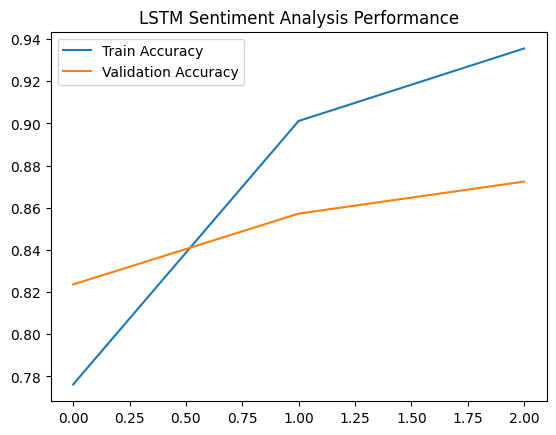

In [8]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("LSTM Sentiment Analysis Performance")
plt.show()

## **Conclusion**

LSTM-based text classification shows how AI captures meaning from sequences. Instead of treating words as independent, the model learns context and order, enabling accurate predictions (positive/negative sentiment). This demonstrates the core NLP objective: making machines understand human language.